In [15]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [8]:
data_evaluation = [
('bea64327334044e29f31d46fb3f2e42f_20230810t15_56_utc.txt','Neutral','Positivo'),
('62ef1875d43648999789f49be5e0dec0_20230708t16_48_utc.txt','Neutral','Neutral'),
('3bc7f3e6dbe0419fa30eacb2504c3a9b_20230411t23_02_utc.txt','Neutral','Neutral'),
('e4b2251c3af045018230986f0720bd68_20230810t16_05_utc.txt','Positivo','Neutral'),
('64ae78283bcc45ba82db806c021a44e7_20230415t14_13_utc.txt','Neutral','Neutral'),
('6635398c7d584690bf4154e37beea86f_20230708t14_40_utc.txt','Negativo','Negativo'),
('0164a21edeb54a4894775e8b0b1ae8c3_20230429t13_40_utc.txt','Neutral','Neutral'),
('c89e81e710cf4a35b513d1af82bc2869_20230708t16_55_utc.txt','Neutral','Neutral'),
('6cf2ef1c3dd04ab2a6c3dc6c8bf42313_20230411t15_10_utc.txt','Neutral','Neutral'),
('81eecbed9c8e4ccdae851f6f4c555177_20230810t17_22_utc.txt','Positivo','Positivo'),
('909110ef-29df-4140-bcbf-34068a4facd7_20230410T19_35_UTC.txt','Neutral','Positivo'),
('355e09f1c2364385acb6ab063e06b92c_20230429t16_00_utc.txt','Neutral','Neutral'),
('712a3952022244de9bb8d9d3c04fa8b4_20230520t16_34_utc.txt','Neutral','Negativo'),
('fcf7599682a54f6f9720ccf731603b62_20230810t14_56_utc.txt','Neutral','Negativo'),
('3af6a602-4a42-4071-b809-da314b31c322_20230422T14_42_UTC.txt','Negativo','Negativo'),
('f399f79640f94bfebba1323714013e12_20230610t16_49_utc.txt','Negativo','Negativo'),
('e0817392-734d-4fa4-a55c-a89311f5ed03_20230422T13_40_UTC.txt','Neutral','Neutral'),
('0756e22d1b2145beb5ecf3147f94f135_20230708t16_40_utc.txt','Neutral','Positivo'),
('4c9c3500961f49d0b7ef1d02df193979_20230429t16_00_utc.txt','Neutral','Positivo'),
('77fe61034f894fe0bd09da0b15c42ed5_20230513t13_39_utc.txt','Positivo','Positivo'),
('5dca1c61-c2bd-40c9-9eae-cf6db205d40b_20230422T16_54_UTC.txt','Neutral','Neutral'),
('56d834c1f2c649e6ae70e29f55c36d69_20230708t13_20_utc.txt','Neutral','Neutral'),
('ef719c3f-93c5-4a92-bcc2-d78687ed6916_20230422T15_06_UTC.txt','Neutral','Neutral'),
('993dc711-9890-4a2c-ba47-09afaa81f7f6_20230401T14_23_UTC.txt','Neutral','Neutral'),
('d8ca88e2884a4bd4a09ca9a05fe469d4_20230411t16_19_utc.txt','Positivo','Positivo'),
('042458ab16354753a745fa3aa2342932_20230513t14_43_utc.txt','Neutral','Neutral'),
('3c1a5ac7-632a-450e-a13d-7acbb6a02587_20230422T16_43_UTC.txt','Negativo','Negativo'),
('a247bd1a122b41fe9a4a20d4fb0bda2a_20230810t15_45_utc.txt','Neutral','Neutral'),
('c04c3a0d1f9943b6ba8509771c6b0ea6_20230810t16_01_utc.txt','Neutral','Negativo'),
('4648b334-55fd-4029-8a6b-56ae900bc728_20230401T15_01_UTC.txt','Neutral','Neutral'),
('c3b47bdca05543538f200cf8f2a4a65f_20230603t16_10_utc.txt','Neutral','Neutral'),
('c019744d4e17460d90278ea172711a0b_20230810t16_06_utc.txt','Positivo','Positivo'),
('1d3fb2e9-3a05-451e-9eb6-c0d915472694_20230401T14_16_UTC.txt','Neutral','Neutral'),
('c1f6bb2519c543fcae4a84ab5027729a_20230415t16_23_utc.txt','Negativo','Negativo'),
('a02d3ac4f86d4db89fe912abf5c4be9f_20230520t14_22_utc.txt','Positivo','Positivo'),
('197676bd2fde4ac89cd54cd79b406d79_20230513t15_08_utc.txt','Neutral','Neutral'),
('766af491-c347-4362-be9a-171ed1ba520b_20230401T16_43_UTC.txt','Neutral','Neutral'),
('9a72fb9a-366e-4065-8c31-b8efc56d0a5a_20230401T16_18_UTC.txt','Neutral','Neutral'),
('e00886da3b1c4d40aef6acf1c2495cca_20230520t15_47_utc.txt','Negativo','Negativo'),
('2dea44d0a836446fadf6677088ca215c_20230411t14_37_utc.txt','Positivo','Positivo'),
('91521c5e99e04963841c2ceb95bafe07_20230810t21_42_utc.txt','Negativo','Negativo'),
('047db9ca-b2af-4229-b2aa-d38f22eb3652_20230401T14_09_UTC.txt','Neutral','Neutral'),
('869de8ec801c4347ab6da95f6cfefb69_20230810t16_23_utc.txt','Positivo','Positivo'),
('90fbb18ea9a04bf9ab2760969446d826_20230429t14_09_utc.txt','Negativo','Negativo'),
('d5d431e4-eb50-4346-9d46-a6403a3fae35_20230410T22_46_UTC.txt','Neutral','Neutral'),
('6599635fa9ac403b868dd67d044d24e4_20230513t14_15_utc.txt','Negativo','Neutral'),
('dc5113b6f9414dd3b47c18fa3fd4a2b5_20230520t13_43_utc.txt','Neutral','Neutral'),
('da4c5e2363254cf588851162ec48f440_20230810t13_39_utc.txt','Negativo','Negativo'),
('1585f02ac1f84ac3b42ce76dad3acb50_20230520t14_45_utc.txt','Neutral','Neutral'),
('22b2a7bbb0c34938879b5da552e193f1_20230708t14_33_utc.txt','Positivo','Positivo'),
('2e360e5d8411410caf65ac52f7ebb612_20230520t15_36_utc.txt','Neutral','Neutral'),
('905f342ba5794efdb4cd6d04cadce2dc_20230520t15_17_utc.txt','Positivo','Neutral'),
('f189e55691f04a0cbca711f6ee0bac4a_20230610t13_18_utc.txt','Positivo','Neutral'),
('c2a3cd89cb164ac9ace2663fa4d97435_20230708t13_52_utc.txt','Negativo','Negativo'),
('b29944d5625e410a99c21d7233921ca9_20230810t17_22_utc.txt','Neutral','Neutral'),
('18710ae2ed9842aabdb637eae2a858c1_20230610t16_04_utc.txt','Positivo','Positivo'),
('3ef7463f90e842c1b2a9c7cf69fee567_20230708t15_42_utc.txt','Neutral','Neutral'),
('9470924f5b984bb7811ea87fc55bdcc0_20230520t15_45_utc.txt','Positivo','Positivo'),
('bc70753cfc0145c797ccd0eb680b0a09_20230411t14_43_utc.txt','Positivo','Positivo'),
('2bf1748f6df24d4494ad8a137f33ed77_20230610t15_22_utc.txt','Neutral','Neutral'),
('a2cea9b8aaf640ed9cad2c5f94027331_20230810t14_46_utc.txt','Neutral','Negativo'),
('d32cce30da684fa093e8b2f9bf5b7ca8_20230415t15_49_utc.txt','Neutral','Neutral'),
('d9553adbba9c45bead6e1a2bded61ad8_20230610t16_33_utc.txt','Neutral','Negativo'),
('ecdee29777ac444c84b2a95afeda5e47_20230415t14_41_utc.txt','Positivo','Positivo'),
('788eeae018b940c397cbb42b95b4475e_20230411t19_05_utc.txt','Neutral','Positivo'),
('031d90bd2c04438a96aa41ae06c154ad_20230603t14_18_utc.txt','Neutral','Neutral'),
('51793dc571d04cce8cff6a0b4a6048a9_20230810t18_09_utc.txt','Neutral','Neutral'),
('3e0945e755e543018eee771ad03022b3_20230708t16_31_utc.txt','Negativo','Negativo'),
('a8a8e3bc-c5e6-4920-8145-fa5d8671d7ed_20230422T14_36_UTC.txt','Neutral','Neutral'),
('e9305be13c9e4cb3a90fcd10d9d7b0ff_20230708t14_12_utc.txt','Neutral','Negativo'),
('939ad70f482e4a44a5ad041d4a08cf9d_20230520t13_41_utc.txt','Neutral','Neutral'),
('bdc1679b294f4d60844c566fef78c4c8_20230610t16_16_utc.txt','Neutral','Negativo'),
('9eda7f11-0ff3-4ae4-a961-c25b10d45f69_20230410T23_26_UTC.txt','Neutral','Neutral'),
('9a0e078aa4ae44ab8bfd8d7ff2af562a_20230415t13_53_utc.txt','Positivo','Positivo'),
('3e9fa1a1a9b5440bbf34ba111196096f_20230411t22_12_utc.txt','Neutral','Neutral'),
('b60cc994-4773-4907-8422-53935fb1858b_20230422T14_30_UTC.txt','Neutral','Neutral'),
('1d5de6a41d82466593d6e193d04448c4_20230429t14_43_utc.txt','Neutral','Negativo'),
('8096aa48196f4231aabd00fd9f1459e0_20230603t14_31_utc.txt','Neutral','Neutral'),
('0f9f909b-b478-4bd1-ae7a-8656ebc39e50_20230401T14_08_UTC.txt','Positivo','Positivo'),
('40b6d5723c0f40cf91e3812ad4c150fe_20230520t15_21_utc.txt','Neutral','Negativo'),
('d15a221c5dce4a34ac2d8bda6ed71ebd_20230610t13_57_utc.txt','Negativo','Negativo'),
('5053088d277040c7a20747e095522b5d_20230810t20_11_utc.txt','Neutral','Neutral'),
('a2637ff40c43496ab428f656f7ff4ea5_20230810t20_02_utc.txt','Neutral','Neutral'),
('e038320178fa4d93bb2806019e66c2aa_20230603t15_53_utc.txt','Negativo','Negativo'),
('7724a495b32b42afaaf73127a3c9adf8_20230603t16_34_utc.txt','Neutral','Neutral'),
('680147b000494098854c4344f4b0dc17_20230411t15_02_utc.txt','Neutral','Neutral'),
('a26436b8f0a74e4ba5f65172a38895c2_20230708t14_22_utc.txt','Neutral','Negativo'),
('6442e97bcee24c49878685fea0ee0472_20230810t15_53_utc.txt','Neutral','Neutral'),
('a00bf8d949f8495d8e80608610ab3fa6_20230708t15_07_utc.txt','Neutral','Negativo'),
('8b1e2596-a7e2-47e2-acca-554449d9a65a_20230422T15_19_UTC.txt','Neutral','Negativo'),
('8d44f7e1c49b457bba12a1a9e21ed13e_20230520t13_45_utc.txt','Neutral','Neutral'),
('c4ec209d72c14b56bdc2b98ba3ef11d2_20230708t16_54_utc.txt','Neutral','Neutral'),
('ff061fcedc8b4efba1075b6c796e110f_20230603t15_54_utc.txt','Negativo','Neutral'),
('a283ece90f984ff08f4079f6d2545107_20230810t15_57_utc.txt','Positivo','Positivo'),
('5abdaff5c2f340f9af07154ba66eecb1_20230429t15_07_utc.txt','Neutral','Neutral'),
('ba01a7bce9204b64ba53e644fba51327_20230708t15_59_utc.txt','Neutral','Neutral'),
('b22bfe99a51b4f3b81ca5b3f71552483_20230520t16_01_utc.txt','Neutral','Negativo'),
('b222d475701a43c9b2829fbd354eae6c_20230810t19_03_utc.txt','Neutral','Neutral'),
('e2b52690f4544076ab12fa60d178d6a5_20230429t13_35_utc.txt','Neutral','Neutral'),
('0a79fec047de48dba1f7d96d1e43bfd3_20230411t20_29_utc.txt','Positivo','Positivo')
]

In [9]:
df = pd.DataFrame(data_evaluation, columns=["FileName", "Predicted_Sentiment", "Actual_Sentiment"])

## Calcular métricas

In [10]:
y_pred = df["Predicted_Sentiment"]
y_true = df["Actual_Sentiment"]

accuracy = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("Precisión (Accuracy):", accuracy)
print("Recall:", recall)
print("F1-Score:", f1)

Precisión (Accuracy): 0.77
Recall: 0.77
F1-Score: 0.7604410739905718


### Matriz de Confusión

Matriz de confusión:
[[48  3  2]
 [ 5 16  0]
 [13  0 13]]


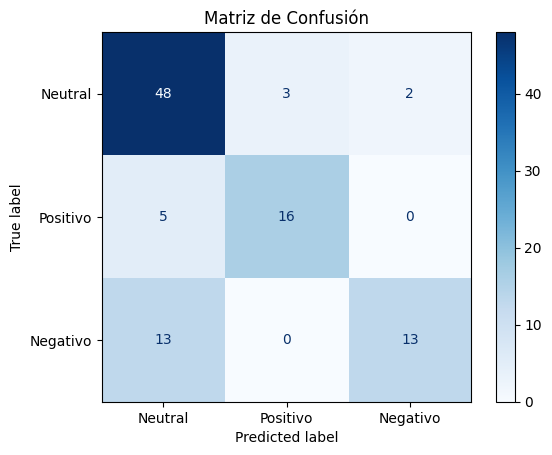

In [14]:
conf_matrix = confusion_matrix(y_true, y_pred, labels=['Neutral', 'Positivo', 'Negativo'])

# Mostrar la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Neutral', 'Positivo', 'Negativo'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

### ROC

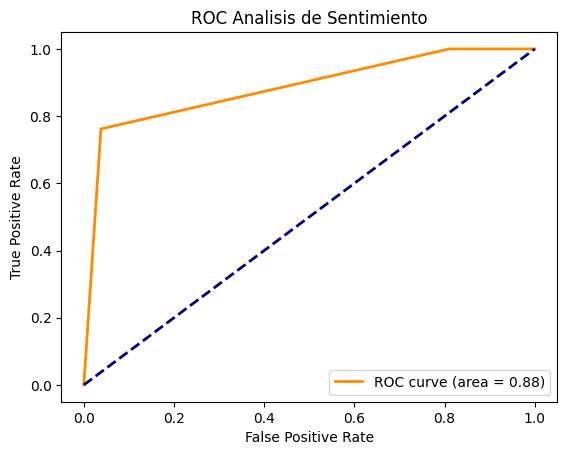

In [18]:
# Mapear a valores numéricos
sentiment_map = {'Positivo': 1, 'Neutral': 0, 'Negativo': -1}
df['True Numeric'] = df['Actual_Sentiment'].map(sentiment_map)
df['Predicted Numeric'] = df['Predicted_Sentiment'].map(sentiment_map)

# Calcular probabilidades simuladas (ejemplo sencillo: 1 para predicción positiva, 0.5 para neutral, 0 para negativa)
df['Predicted Probability'] = df['Predicted Numeric'].map({1: 1.0, 0: 0.5, -1: 0.0})

# Calcular ROC
fpr, tpr, thresholds = roc_curve(df['True Numeric'], df['Predicted Probability'], pos_label=1)
roc_auc = auc(fpr, tpr)

# Graficar ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Analisis de Sentimiento')
plt.legend(loc="lower right")
plt.show()